In [49]:
import numpy as np
import matplotlib.pyplot as plt

def myplot(myx,myy,granularity,func):
    # Initialize the grid
    n = granularity
    x = np.linspace(myx[0],myx[1],n) # all the x points on the graph
    y = np.linspace(myy[0],myy[1],n) # all the y points on the graph
    X,Y = np.meshgrid(x,y) # Matrix of all points in the graph. 
                       # X=matrix of X values, same value in each column. 
                       # Y=matrix of y values, same value in each row
    Z = np.zeros(X.shape) # This will be the matrix of the predicted value for that point in the matrix

    # Classify each point in the grid
    for iy in range(X.shape[0]):
        for ix in range(X.shape[1]):
            Z[iy][ix] = func(x[ix],y[iy]) # return the integer class the model will predict at point ix,iy

    # Plot it with matplotlib.pyplot as plt 
    plt.contourf(X, Y, Z, alpha=.5, cmap='jet') # Fills in the boundary colors
    plt.contour(X, Y, Z, colors='black') # Draws the boundary lines
    plt.show()

In [50]:
def myfunction(x,y):
    myreturn = 0
    myval = x + y
    if (x + 1) > myval:
        myreturn = 1
        myval = x + 1
    if (y - 1) > myval:
        myreturn = 2
    return myreturn

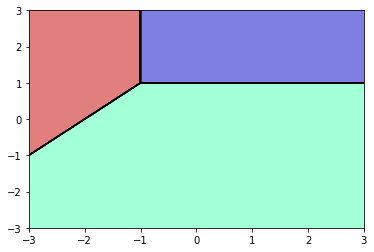

In [53]:
myplot([-3,3],[-3,3],1000,myfunction)
# Note: colors go from blue to red (0 is blue, 1 is green, 2 is red)

In [57]:
x = []
y = []

with open("data0.txt", "r") as filestream:
    for line in filestream:
        currentline = line.split()
        if len(currentline) == 0:
            break
        temp = []
        for i in range(len(currentline) - 1):
            temp.append(int(currentline[i]))
        x.append(temp)
        y.append(int(currentline[-1]))
        
print (x[0])
print (y[0])

[1, 1]
0


In [68]:
def dotprod(x,y):
    returnval = 0
    for i in range(len(x)):
        returnval += x[i]*y[i]
    return returnval

def multi_percep(x,y):
    weights = [[0,0],[0,0],[0,0],[0,0]]
    b = [0,0,0,0]
    num_wrong = 100
    
    while (num_wrong > 0):
        num_wrong = 0
        for i in range(len(x)):
            values = [0,0,0,0]
            values[0] = dotprod(weights[0],x[i]) + b[0]
            values[1] = dotprod(weights[1],x[i]) + b[1]
            values[2] = dotprod(weights[2],x[i]) + b[2]
            values[3] = dotprod(weights[3],x[i]) + b[3]
            prediction = values.index(max(values))
            
            if prediction != y[i]:
                weights[y[i]][0] += x[i][0]
                weights[y[i]][1] += x[i][1]
                b[y[i]] += 1
                weights[prediction][0] -= x[i][0]
                weights[prediction][1] -= x[i][1]
                b[prediction] -= 1
                num_wrong += 1
    
    return [weights,b]

In [69]:
[a,b] = multi_percep(x,y)

In [70]:
print (a)
print (b)

[[5, -8], [-46, 35], [29, -34], [12, 7]]
[62, -16, -13, -33]


In [71]:
def myfunction2(x,y):
    myreturn = 0
    myvals = [0,0,0,0]
    myvals[0] = dotprod(a[0],[x,y]) + b[0]
    myvals[1] = dotprod(a[1],[x,y]) + b[1]
    myvals[2] = dotprod(a[2],[x,y]) + b[2]
    myvals[3] = dotprod(a[3],[x,y]) + b[3]
    
    return myvals.index(max(myvals))

In [86]:
def myplot2(myx,myy,granularity,func,xscatter,yscatter,colorscatter):
    # Initialize the grid
    n = granularity
    x = np.linspace(myx[0],myx[1],n) # all the x points on the graph
    y = np.linspace(myy[0],myy[1],n) # all the y points on the graph
    X,Y = np.meshgrid(x,y) # Matrix of all points in the graph. 
                       # X=matrix of X values, same value in each column. 
                       # Y=matrix of y values, same value in each row
    Z = np.zeros(X.shape) # This will be the matrix of the predicted value for that point in the matrix

    # Classify each point in the grid
    for iy in range(X.shape[0]):
        for ix in range(X.shape[1]):
            Z[iy][ix] = func(x[ix],y[iy]) # return the integer class the model will predict at point ix,iy

    # Plot it with matplotlib.pyplot as plt 
    plt.contourf(X, Y, Z, alpha=.5, cmap='jet') # Fills in the boundary colors
    plt.contour(X, Y, Z, colors='black') # Draws the boundary lines
    markers = []
    mycolors = []
    for i in range(len(colorscatter)):
        if colorscatter[i] == 0:
            markers.append(u'o')
            mycolors.append('b')
        if colorscatter[i] == 1:
            markers.append(u'^')
            mycolors.append('g')
        if colorscatter[i] == 2:
            markers.append(u's')
            mycolors.append('r')
        if colorscatter[i] == 3:
            markers.append(u'*')
            mycolors.append('y')
    for xp, yp, mycolor, m in zip(xscatter, yscatter, mycolors, markers):
        plt.scatter([xp],[yp], c=mycolor, marker=m)
    #plt.scatter(xscatter,yscatter,c=colorscatter,marker=markers)
    plt.show()

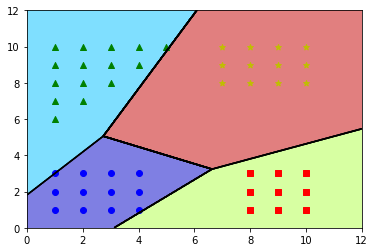

In [87]:
x1 = []
x2 = []
for i in range(len(x)):
    x1.append(x[i][0])
    x2.append(x[i][1])
myplot2([0,12],[0,12],1000,myfunction2,x1,x2,y)

In [90]:
x1 = []
y1 = []

with open("data1.txt", "r") as filestream:
    for line in filestream:
        currentline = line.split()
        if len(currentline) == 0:
            break
        temp = []
        for i in range(len(currentline) - 1):
            temp.append(int(currentline[i]))
        x1.append(temp)
        y1.append(int(currentline[-1]))
        
print (x1[1])
print (y1[1])

x2 = []
y2 = []

with open("data2.txt", "r") as filestream:
    for line in filestream:
        currentline = line.split()
        if len(currentline) == 0:
            break
        temp = []
        for i in range(len(currentline) - 1):
            temp.append(int(currentline[i]))
        x2.append(temp)
        y2.append(int(currentline[-1]))
        
print (x2[1])
print (y2[1])

[2, 1]
1
[1, 2]
1


In [91]:
def kernel_percep(x,y,kernel):
    alpha = [0]*len(x)
    b = 0
    num_wrong = 100
    
    while (num_wrong > 0):
        num_wrong = 0
        for i in range(len(x)):
            mysum = 0
            for j in range(len(x)):
                mysum += alpha[j]*y[j]*kernel(x[j],x[i])
            if y[i]*(mysum + b) <= 0:
                alpha[i] += 1
                b += y[i]
                num_wrong += 1
    
    return [alpha,b]

In [92]:
def quadkernel(x,z):
    return (1+dotprod(x,z))**2

In [95]:
[a,b] = kernel_percep(x1,y1,quadkernel)

In [96]:
print (a)
print (b)

[5, 5, 4, 4, 1, 0, 0, 0, 0, 0, 4, 4, 2, 1, 0, 0, 0, 0, 0, 0, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
36


In [97]:
def myfunction3(x,y):
    mysum = 0
    for i in range(len(a)):
        mysum += a[i]*y1[i]*quadkernel(x1[i],[x,y])
    if mysum + b <= 0:
        return 0
    else:
        return 1

In [98]:
def myplot3(myx,myy,granularity,func,xscatter,yscatter,colorscatter):
    # Initialize the grid
    n = granularity
    x = np.linspace(myx[0],myx[1],n) # all the x points on the graph
    y = np.linspace(myy[0],myy[1],n) # all the y points on the graph
    X,Y = np.meshgrid(x,y) # Matrix of all points in the graph. 
                       # X=matrix of X values, same value in each column. 
                       # Y=matrix of y values, same value in each row
    Z = np.zeros(X.shape) # This will be the matrix of the predicted value for that point in the matrix

    # Classify each point in the grid
    for iy in range(X.shape[0]):
        for ix in range(X.shape[1]):
            Z[iy][ix] = func(x[ix],y[iy]) # return the integer class the model will predict at point ix,iy

    # Plot it with matplotlib.pyplot as plt 
    plt.contourf(X, Y, Z, alpha=.5, cmap='jet') # Fills in the boundary colors
    plt.contour(X, Y, Z, colors='black') # Draws the boundary lines
    markers = []
    mycolors = []
    for i in range(len(colorscatter)):
        if colorscatter[i] == -1:
            markers.append(u'o')
            mycolors.append('b')
        if colorscatter[i] == 1:
            markers.append(u'^')
            mycolors.append('g')
    for xp, yp, mycolor, m in zip(xscatter, yscatter, mycolors, markers):
        plt.scatter([xp],[yp], c=mycolor, marker=m)
    #plt.scatter(xscatter,yscatter,c=colorscatter,marker=markers)
    plt.show()

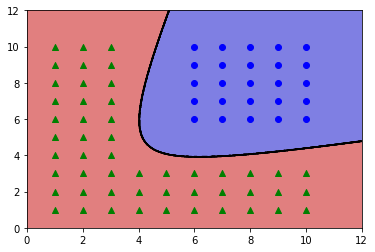

In [102]:
xscatter = []
yscatter = []
for i in range(len(x1)):
    xscatter.append(x1[i][0])
    yscatter.append(x1[i][1])
myplot3([0,12],[0,12],1000,myfunction3,xscatter,yscatter,y1)

In [104]:
[a,b] = kernel_percep(x2,y2,quadkernel)

def myfunction4(x,y):
    mysum = 0
    for i in range(len(a)):
        mysum += a[i]*y2[i]*quadkernel(x2[i],[x,y])
    if mysum + b <= 0:
        return 0
    else:
        return 1

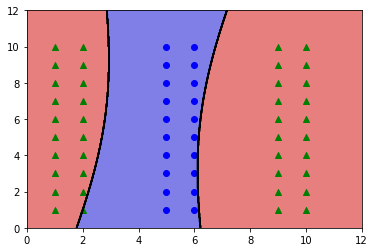

In [107]:
xscatter = []
yscatter = []
for i in range(len(x2)):
    xscatter.append(x2[i][0])
    yscatter.append(x2[i][1])
myplot3([0,12],[0,12],1000,myfunction4,xscatter,yscatter,y2)

In [116]:
import math

def rbfkernel(x,z):
    mysum = 0
    for i in range(len(x)):
        mysum += (x[i] - z[i])**2
    exponent = -1*mysum/1 #s=1, s^2=1
    return math.exp(exponent)

def rbfkernel2(x,z):
    mysum = 0
    for i in range(len(x)):
        mysum += (x[i] - z[i])**2
    exponent = -1*mysum/100 #s=10, s^2=100
    return math.exp(exponent)

In [117]:
[a,b] = kernel_percep(x1,y1,rbfkernel)

def myfunction5(x,y):
    mysum = 0
    for i in range(len(a)):
        mysum += a[i]*y1[i]*rbfkernel(x1[i],[x,y])
    if mysum + b <= 0:
        return 0
    else:
        return 1

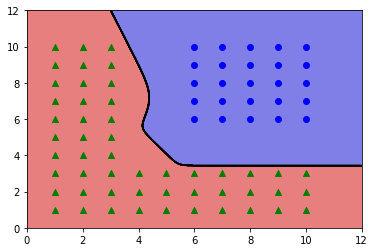

In [120]:
xscatter = []
yscatter = []
for i in range(len(x1)):
    xscatter.append(x1[i][0])
    yscatter.append(x1[i][1])
myplot3([0,12],[0,12],1000,myfunction5,xscatter,yscatter,y1)

In [124]:
[a,b] = kernel_percep(x1,y1,rbfkernel2)

def myfunction6(x,y):
    mysum = 0
    for i in range(len(a)):
        mysum += a[i]*y1[i]*rbfkernel2(x1[i],[x,y])
    if mysum + b <= 0:
        return 0
    else:
        return 1

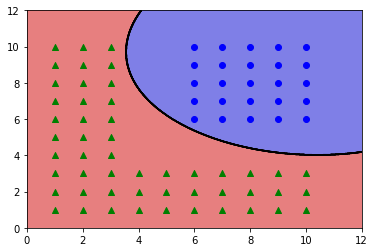

In [125]:
xscatter = []
yscatter = []
for i in range(len(x1)):
    xscatter.append(x1[i][0])
    yscatter.append(x1[i][1])
myplot3([0,12],[0,12],1000,myfunction6,xscatter,yscatter,y1)

In [132]:
[a,b] = kernel_percep(x2,y2,rbfkernel)

def myfunction7(x,y):
    mysum = 0
    for i in range(len(a)):
        mysum += a[i]*y2[i]*rbfkernel(x2[i],[x,y])
    if mysum + b <= 0:
        return 0
    else:
        return 1

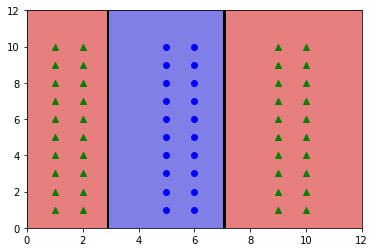

In [133]:
xscatter = []
yscatter = []
for i in range(len(x2)):
    xscatter.append(x2[i][0])
    yscatter.append(x2[i][1])
myplot3([0,12],[0,12],1000,myfunction7,xscatter,yscatter,y2)

In [134]:
[a,b] = kernel_percep(x2,y2,rbfkernel2)

def myfunction8(x,y):
    mysum = 0
    for i in range(len(a)):
        mysum += a[i]*y2[i]*rbfkernel2(x2[i],[x,y])
    if mysum + b <= 0:
        return 0
    else:
        return 1

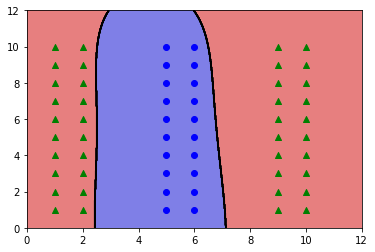

In [135]:
xscatter = []
yscatter = []
for i in range(len(x2)):
    xscatter.append(x2[i][0])
    yscatter.append(x2[i][1])
myplot3([0,12],[0,12],1000,myfunction8,xscatter,yscatter,y2)